In [1]:
import numpy as np
import pandas as pd
import scipy as sc
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("credit_card_default_analysis.csv")
print "Total number of records: ", data.shape[0]
data.head()

Total number of records:  30000


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
print data.default.value_counts()
data.describe()

0    23364
1     6636
Name: default, dtype: int64


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,0.356767,0.320033,0.304067,0.258767,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,0.760594,0.801727,0.790589,0.761113,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## 1.a. Проверка гипотезы о равенстве медианных значений кредитного лимита с помощью интервальной оценки и бутстрепа

In [4]:
default = data[data.default==1].LIMIT_BAL.values
med1 = np.median(default)

nodefault = data[data.default==0].LIMIT_BAL.values
med2 = np.median(nodefault)

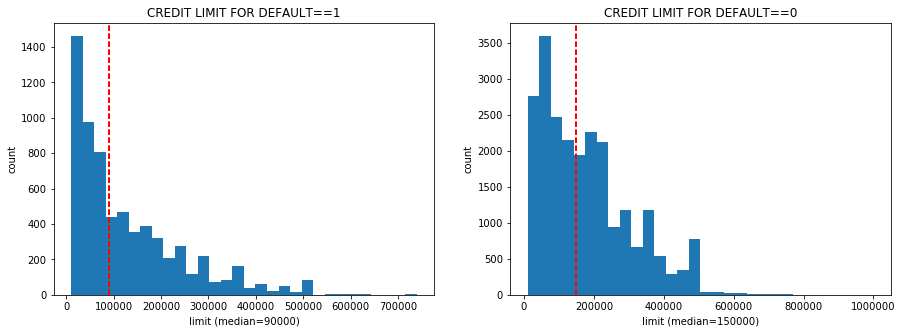

Median for DEF=1: 90000.00
Median for DEF=0: 150000.00


In [5]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(default, bins=30)
plt.axvline(med1, color='r', linestyle='dashed', linewidth=2)
plt.xlabel("limit (median=%d)" % med1)
plt.ylabel("count")
plt.title("CREDIT LIMIT FOR DEFAULT==1")

plt.subplot(1,2,2)
plt.hist(nodefault, bins=30)
plt.xlabel("limit (median=%d)" % med2)
plt.ylabel("count")
plt.title("CREDIT LIMIT FOR DEFAULT==0")
plt.axvline(med2, color='r', linestyle='dashed', linewidth=2)

plt.show()

print "Median for DEF=1: %.2f" % med1
print "Median for DEF=0: %.2f" % med2

Как видно из графиков, распределения не похожи на нормальное и отличаются между собой (медианы также численно не равны).

In [6]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [7]:
def stat_intervals(stat, alpha=0.05):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [8]:
np.random.seed(123)

def_median_scores = np.median(get_bootstrap_samples(default, 1000), axis=1)
nodef_median_scores = np.median(get_bootstrap_samples(nodefault, 1000), axis=1)

print "95% confidence interval for Default clients:",  stat_intervals(def_median_scores)
print "95% confidence interval for Good clients:",  stat_intervals(nodef_median_scores)

95% confidence interval for Default clients: [ 80000.  90000.]
95% confidence interval for Good clients: [ 150000.  150000.]


Доверительные интервалы для медиан не пересекаются. Для хороших (платящих) клиентов кредитный лимит больше.

Оценим разность медиан. Точечная оценка:

In [9]:
print "delta median", np.median(nodefault) - np.median(default)

delta median 60000.0


Интервальная оценка:

In [10]:
median_scores = map(lambda x: x[0] - x[1], zip(def_median_scores, nodef_median_scores))
print ("95% confidence interval for difference median:",  stat_intervals(median_scores))

('95% confidence interval for difference median:', array([-70000., -60000.]))


Согласно полученному доверительному интервалу разницы медиан, гипотеза об одинаковости медианных значений можно уверенно отвергнуть, поскольку полученный интервал не содержит "0"

1.б. Проверка гипотезы о равенстве распределений с помощью перестановочного критерия

Перестановочный критерий для независимых выборок:

$H_0\colon F_{X_1}(x) = F_{X_2}(x)$

$H_1\colon F_{X_1}(x) = F_{X_2}(x + \Delta),\Delta&lt; \neq&gt;0$

В данном случае

$H_0$: среднее значение кредитного лимита одинаково для вернувших и не вернувших кредит;

$H_1$: среднее значение отличается в этих двух группах.

In [11]:
def permutation_test_ind(sample1, sample2, max_permutations=None, alternative='two-sided'):
    ''' Перестановочный критерий (независимые выборки)

    :param sample1: выборка 1
    :param sample2: выборка 2
    :param max_combinations: количество перестановок, None - все возможные
    :param alternative: альтернатива ['two-sided', 'less', 'greater']
    :return: достигаемый уровень значимости (p-value)
    '''

    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")

    t_stat = permutation_t_stat_ind(sample1, sample2)

    zero_distr = permutation_zero_dist_ind(sample1, sample2, max_permutations)

    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)


def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]


def permutation_zero_dist_ind(sample1, sample2, max_combinations=None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)

    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                   for index in itertools.combinations(range(n), n1)]

    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

In [12]:
pval = permutation_test_ind(nodefault, default, max_permutations=10000)
print "Достигаемый уровень значимости перестановочного критерия: %.5f" % pval

Достигаемый уровень значимости перестановочного критерия: 0.00010


pvalue очень маленькое, на уровне значимости 0.05 нулевая гипотеза отвергается. Распределния не равны.

Результат имеет практическую значимость - заёмщики, запрашивающие кредиты около 80-90 тыс. р. попадают в группу повышенного риска. Такие заявки требуют дополнительной проверки.

## 2. Проверка гипотезы о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается

In [13]:
data.SEX.value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [14]:
print u"Таблица сопряженности:"
table_sex = data.pivot_table(index='default', 
     values="LIMIT_BAL", columns='SEX', aggfunc = len, fill_value=0)
table_sex.head()

Таблица сопряженности:


SEX,1,2
default,,
0,9015,14349
1,2873,3763


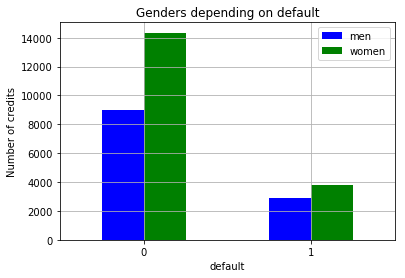

In [15]:
table_sex.plot.bar(color='bg', rot=0)
plt.xlabel("default")
plt.ylabel("Number of credits")
plt.title("Genders depending on default")
plt.legend(["men", "women"])
plt.grid()

plt.show()

Проверим гипотезу гипотезу о совпадении гендерного состава в обоих выборках. Предполагаем, что выборки имеют распределения Бернулли с распределениями $Ber(p_{1})$ и $Ber(p_{2})$.

$H_{0} \colon p_{1} = p{2}$

$H_{1} \colon p_{1}$ $lt;\neq &gt; p_{2}$

В данном случае 

$H_0$: гендерный состав групп совпадает 
$H_1$: гендерный состав групп различается

In [16]:
nodef_sex = data[data['default'] == 0]['SEX']
def_sex = data[data['default'] == 1]['SEX']


Проверим гипотезы с помощью доверительного интервала для разности долей

In [17]:
def proportions_diff_confint_ind(sample1, sample2, alpha=0.05):
    ''' Доверительный интервал для разности долей (независимые выборки)

    :param sample1: выборка 1 с бинарными значениями [0, 1]
    :param sample2: выборка 2 с бинарными значениями [0, 1]
    :param alpha: уровень доверия
    :return: доверительный интервал для разности долей (левая_граница, правая_граница)
    '''

    z = stats.norm.ppf(1 - alpha / 2.)

    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)

    left_boundary = (p1 - p2) - z * np.sqrt(
        p1 * (1 - p1) / len(sample1) + p2 * (1 - p2) / len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(
        p1 * (1 - p1) / len(sample1) + p2 * (1 - p2) / len(sample2))

    return (left_boundary, right_boundary)

In [18]:
alpha = 0.05
interval = proportions_diff_confint_ind(list(map(lambda x: 0 if x == 2 else x, nodef_sex)),
                                        list(map(lambda x: 0 if x == 2 else x, def_sex)), alpha)
print "%d confidence interval for a difference between proportions: [%.4f], [%.4f]" % ((1 - alpha) * 100, interval[0], interval[1])

95 confidence interval for a difference between proportions: [-0.0605], [-0.0336]


Доверительный интеравал для разности долей мужчин и женщин не содержит нуля; гендерный состав групп вернувших кредит и не вернувших кредит различный.

Для проверки гипотезы с помощью статистического критерия применим точный тест Фишера, который не имеет ограничений, в отличии от критерия хи-квадрат.

In [19]:
oddsratio, pval = stats.fisher_exact(table_sex.values, alternative='two-sided')
print "Odds ratio: %.2f" % oddsratio
print "P-value: %s" % pval

Odds ratio: 0.82
P-value: 5.25283805211e-12


Гипотеза отвергается. Т.е. гендерный состав двух групп отличается, результат имеет практическую значимость - среди не вернувших кредит больше заёмщиков-мужчин.

## 3. Проверка гипотезы о том, что образование не влияет на то, вернет ли человек долг

In [20]:
edu_names = ["Ph.D.", "Master", "Bachelor", "Graduate school", "Elementary education", "N/A"]
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [21]:
def_edu = data[data.default==1].EDUCATION.values
nodef_edu = data[data.default==0].EDUCATION.values

In [22]:
table_edu = data.pivot_table(index='default', 
     values="LIMIT_BAL", columns='EDUCATION', aggfunc = len, fill_value=0)
table_edu.head()

EDUCATION,0,1,2,3,4,5,6
default,,,,,,,
0,14,8549,10700,3680,116,262,43
1,0,2036,3330,1237,7,18,8


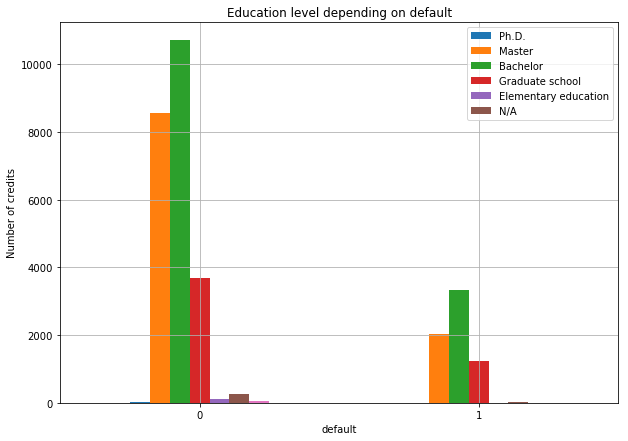

In [23]:
table_edu.plot.bar(rot=0, figsize=(10, 7))
plt.xlabel("default")
plt.ylabel("Number of credits")
plt.title("Education level depending on default")
plt.legend(edu_names)
plt.grid()
plt.show()

Проверку гипотезы будем осуществлять с помощью критерия хи-квадрат.

Убедимся в правомерности применения статистики хи-квадрат в соответствии с правилами:

- количество объектов в таблице сопряжённости $$n\geq 40$$

- ожидаемое количество элементов в таблице $${n_{i+} n_{+j} \over n} &lt; 5 \text{ не более, чем в 20% случаев}$$

In [24]:
print u'Кол-во объектов в таблице:', np.sum(np.array(table_edu))
print u'Доля элементов меньше 5:', 1.*np.sum(np.array(table_edu) < 5) / (table_edu.shape[0] * table_edu.shape[1])

Кол-во объектов в таблице: 30000
Доля элементов меньше 5: 0.0714285714286


$H_0$: уровень образования не влияет на возврат кредита 

$H_1$: влияет

In [26]:
chi2, pval, dof, ex = stats.chi2_contingency(table_edu.values)
print "chi2 contingency: %.4f, p-value: %s" % (chi2, pval)

chi2 contingency: 163.2166, p-value: 1.23326262454e-32


На уровне значимости 0.05 нулевая гипотеза отвергается

Визуализируем разницу в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг

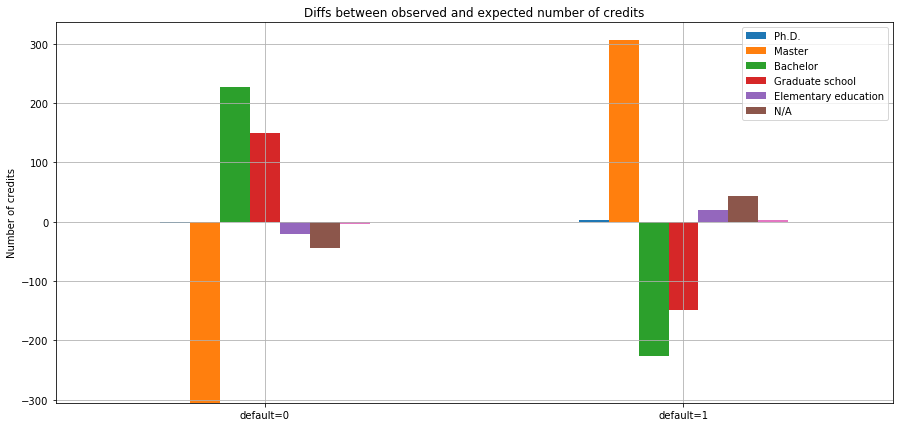

In [27]:
table_diff_edu1 = pd.DataFrame(data=ex-table_edu.values, columns=table_edu.columns)
table_diff_edu1.rename(index={0: "default=0", 1: "default=1"}, inplace=True)

table_diff_edu1.plot.bar(rot=0, figsize=(15, 7))
plt.ylabel("Number of credits")
plt.title("Diffs between observed and expected number of credits")
plt.legend(edu_names)
plt.grid()
plt.show()

Значения очень похожи - они зеркально противоположны

Визуализируем разность между количеством человек вернувших и не вернувших долг по каждому из значений образования

C:\Users\sergey.pilnikov\AppData\Local\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


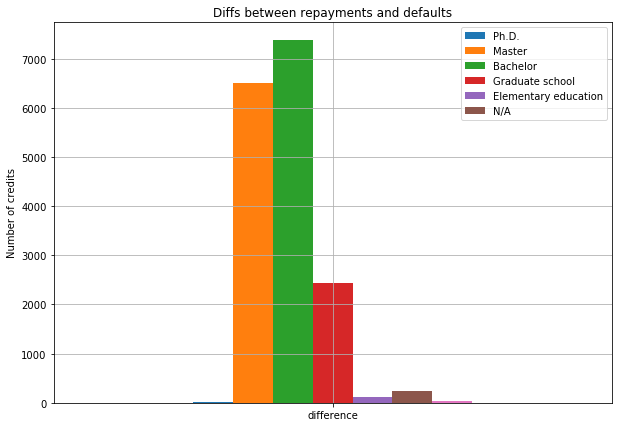

In [28]:
table_diff_edu2 = pd.DataFrame(data=(table_edu.loc[0] - table_edu.loc[1]).reshape(1,7),
                               columns=table_edu.columns, index = ["difference"])

table_diff_edu2.plot.bar(rot=0, figsize=(10, 7))
plt.ylabel("Number of credits")
plt.title("Diffs between repayments and defaults")
plt.legend(edu_names)
plt.grid()
plt.show()

Приведем значения ячеек к одному масштабу. Для этого разделим каждое значение разности на количество людей в этой подгруппе. Чем больше полученное значение, тем больше доля людей в этой группе, которые вернули кредит.

C:\Users\sergey.pilnikov\AppData\Local\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


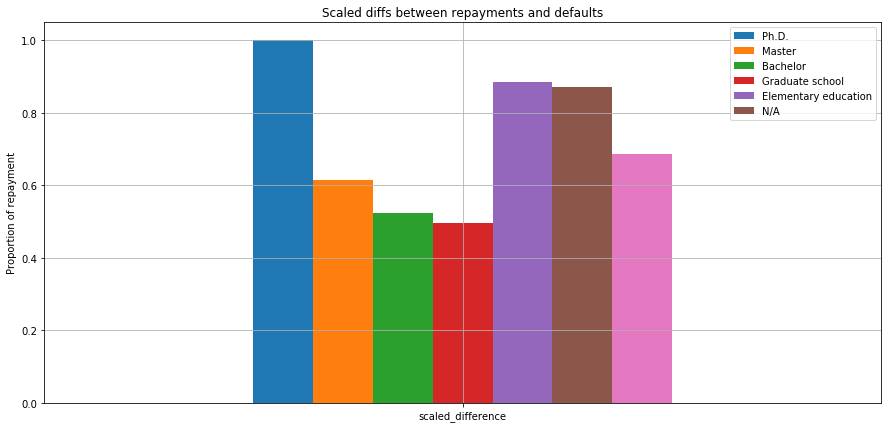

In [29]:
diff_edu2_scaled = (table_edu.loc[0] - table_edu.loc[1]) / ((table_edu.loc[0] + table_edu.loc[1]))
table_diff_edu2_scaled = pd.DataFrame(data=diff_edu2_scaled.reshape(1,7),
                                      columns=table_edu.columns, index = ["scaled_difference"])

table_diff_edu2_scaled.plot.bar(rot=0, figsize=(15, 7))
plt.ylabel("Proportion of repayment")
plt.title("Scaled diffs between repayments and defaults")
plt.legend(edu_names)
plt.grid()
plt.show()

Хуже всего возвращают кредиты люди с образованием "выпускник школы" и "бакалавр", лучше всего - доктора и магистры.

## 4. Проверка связи семейного статуса с индикатором дефолта

In [30]:
mar_names = ["refused", "married", "single", "N/A"]
data.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [31]:
table_mar = data.pivot_table(index='default', 
     values="LIMIT_BAL", columns='MARRIAGE', aggfunc = len, fill_value=0)
table_mar.head()

MARRIAGE,0,1,2,3
default,,,,
0,49,10453,12623,239
1,5,3206,3341,84


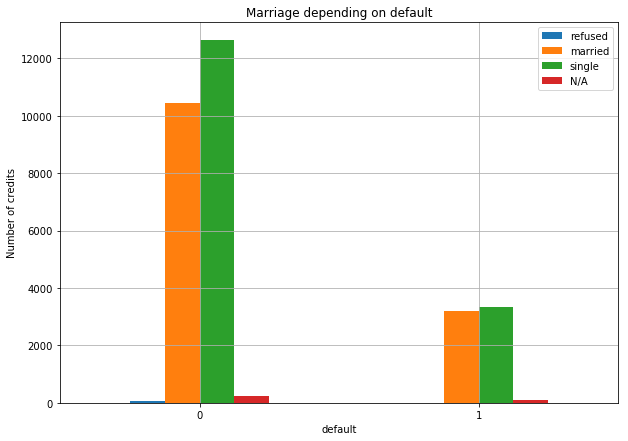

In [32]:
table_mar.plot.bar(rot=0, figsize=(10, 7))
plt.xlabel("default")
plt.ylabel("Number of credits")
plt.title("Marriage depending on default")
plt.legend(mar_names)
plt.grid()
plt.show()

Посчитаем коэффициент V Крамера, предварительно проверив применимость критерия хи-квадрат

In [33]:
print 'Кол-во измерений в совокупной выборке:', np.sum(np.array(table_mar))
print 'Доля элементов меньше 5:', np.sum(np.array(table_mar) < 5) / (table_mar.shape[0] * table_mar.shape[1])

Кол-во измерений в совокупной выборке: 30000
Доля элементов меньше 5: 0


In [34]:
chi2, p, dof, exp = stats.chi2_contingency(table_mar)

n = table_mar.sum(axis = 0).sum()
cr_v = (chi2 / n) ** 0.5

print 'Cramer\'s V = %.4f' % cr_v
print 'p-value = ', p

Cramer's V = 0.0345
p-value =  8.82586245758e-08


По значению p-value отвергаем нулевую гипотезу. Исходя из значения коэффициента Крамера корреляция не очень значительна.

На уровне значимости 0.05 семейное положение заёмщика не связано с возвратом или неозвратом им кредита.

## 5а. Проверка гипотезы о равенстве медианных значений возрастов людей

In [35]:
nodef_age = data[data['default'] == 0].AGE.values
def_age = data[data['default'] == 1].AGE.values

nodef_age_median = np.median(nodef_age)
def_age_median = np.median(def_age)

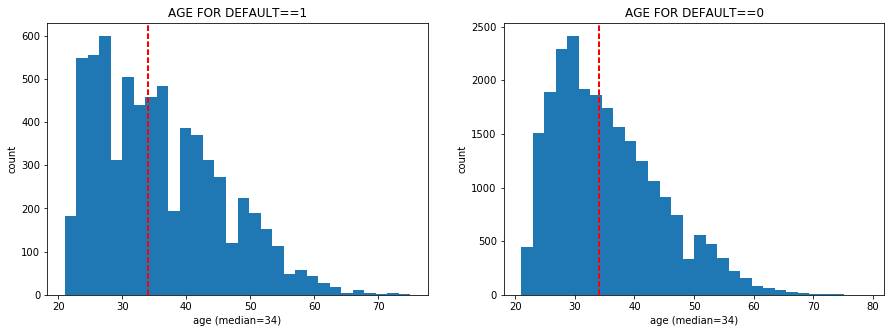

Median for DEF=1: 34.00
Median for DEF=0: 34.00


In [36]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(def_age, bins=30)
plt.axvline(def_age_median, color='r', linestyle='dashed', linewidth=2)
plt.xlabel("age (median=%d)" % def_age_median)
plt.ylabel("count")
plt.title("AGE FOR DEFAULT==1")

plt.subplot(1,2,2)
plt.hist(nodef_age, bins=30)
plt.xlabel("age (median=%d)" % nodef_age_median)
plt.ylabel("count")
plt.title("AGE FOR DEFAULT==0")
plt.axvline(nodef_age_median, color='r', linestyle='dashed', linewidth=2)

plt.show()

print "Median for DEF=1: %.2f" % def_age_median
print "Median for DEF=0: %.2f" % nodef_age_median

Как видно из графика - распределения не похожи на нормальные

In [37]:
np.random.seed(123)

def_median_scores = np.median(get_bootstrap_samples(def_age, 1000), axis=1)
nodef_median_scores = np.median(get_bootstrap_samples(nodef_age, 1000), axis=1)

print "95% confidence interval for Default clients:",  stat_intervals(def_median_scores)
print "95% confidence interval for Good clients:",  stat_intervals(nodef_median_scores)

95% confidence interval for Default clients: [ 34.  35.]
95% confidence interval for Good clients: [ 34.  34.]


Видно что доверительные интервалы имеют пересечение. Построим доверительный интервал для разности медиан.

In [38]:
age_median_delta = np.array(nodef_median_scores) - np.array(def_median_scores)

stat_intervals(age_median_delta, 0.05)

array([-1.,  0.])

Видим, что доверительный интервал содержит ноль, отсюда можно предположить что медианы значимо не отличаются.

Применим Критерий Манна-Уитни для проверки равенства средних:

$H_0$: - средние равны

$H_1$: - средние не равны

In [39]:
stats.mannwhitneyu(def_age, nodef_age)

MannwhitneyuResult(statistic=76966879.5, pvalue=0.18625177174493079)

Значение p-value довольно большое и не позволяет нам отклонить нулевую гипотезу о равенстве средних.

Возраст не значим для данной скоринговой модели.